# Predicting shape of damped oscillator using only two fully-connected layers

In this example you'll find a neural network which predicts values for _visually_ complex damped oscillator. There are some hyperparameters in the next cell so you can play around with different values and see difference between results.

Although this function's shape looks quite complex NN could learn precisly using just **30** samples and 2 fully-connected layers. It's possible to make it even more precise providing slightly higher amount of input samples or/and number of epochs


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.metrics import mean_squared_error

# Parameters to play with
SAMPLES = 30
EPOCHS = 20
BATCH_SIZE = 1

# fix random seed for reproducibility
np.random.seed(7)



Using TensorFlow backend.


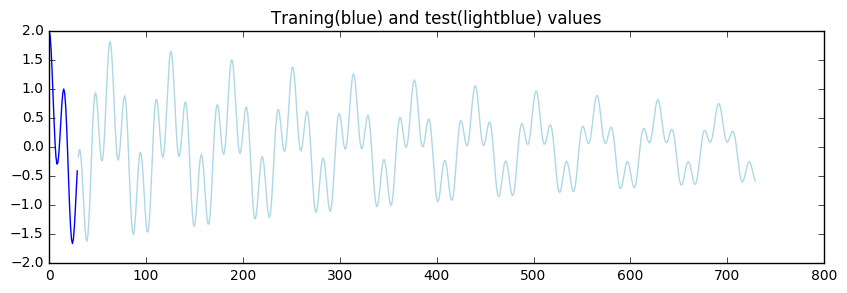

In [2]:
def f(x): 
    """ This is simple damped oscillator, not so fancy but it worth to try """
    return np.exp(-x/40) * np.cos(x/1)


def f(x): 
    """ Nice handcrafted complex function of two damped oscillators """
    return np.exp(-x/500) * np.cos(x/2.5) + np.exp(-x/1000) * np.cos(x/10)  


def gen(count, start = 0):
    """ Function generates X, Y values """
    r = np.arange(start, count+start)
    return r, f(r)

def dataset(values):
    """ Produce dataset - pairs of two values(v1, v2), (v2, v3), (v3, v4).. as tuple """
    return np.array(values[1:]), np.array(values[0:-1])


Xtrain, Ytrain = gen(SAMPLES)
Xtest, Ytest = gen(700, start=SAMPLES)
plt.figure(figsize=(10,3))
plt.title('Traning(blue) and test(lightblue) values')
plt.plot(Xtrain, Ytrain, color='blue')
plt.plot(Xtest, Ytest, color='lightblue')
plt.show()


## Create traning and testing datasets

(X, Y) here are prev and next values of our `f()` function. **Unlike** [previous example](https://github.com/ruXlab/keras-experiments/tree/master/2-SGD-for-polynomial-function) where function argument was input and function value was output here we have something similar to _sliding window_ over values. Actually we don't care about argument but use historical value as argument


In [3]:
# Create datasets
trainX, trainY = dataset(Ytrain)
testX, testY = dataset(Ytest)

# Reshape input data 
trainX = trainX[:, None]
testX = testX[:, None]


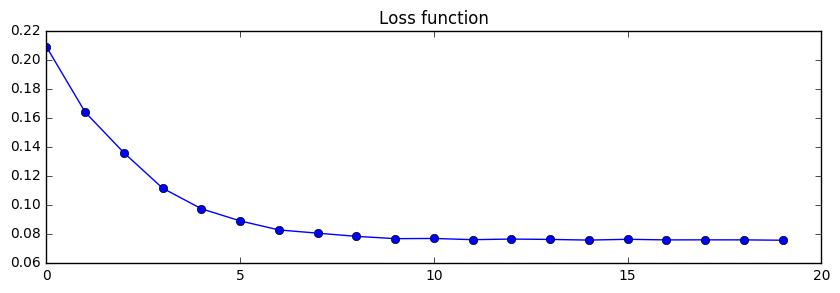

In [4]:
# Create and fit the simple NN network.
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
fit_history = model.fit(trainX, trainY, nb_epoch=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

# Plot loss function values per epoch
plt.figure(figsize=(10,3))
plt.title('Loss function')
plt.plot(fit_history.history['loss'], 'b-o')
plt.show()


In [5]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.28 RMSE
Test Score: 0.18 RMSE


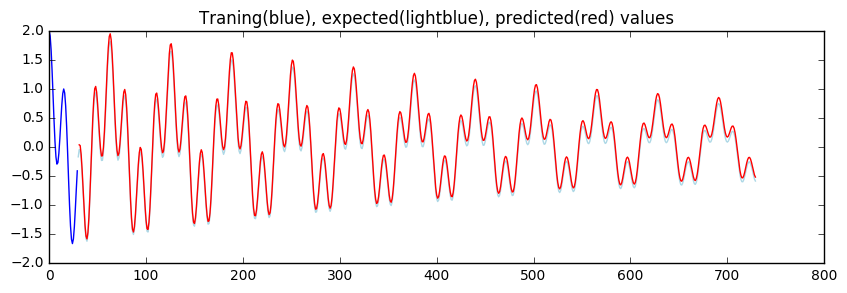

In [6]:
# Plot our training set, true and predicted values
# Can you spot blue line? Increase traning set and/or epochs amount and won't be able to find it anymore!

plt.figure(figsize=(10,3))
plt.title('Traning(blue), expected(lightblue), predicted(red) values')
plt.plot(Xtrain, Ytrain, color='blue')
plt.plot(Xtest, Ytest, color='lightblue')
plt.plot(Xtest[1:], testPredict[:,0], color='red')
plt.show()


&copy; ruX's  experiments with keras

Originally published on github [https://github.com/ruXlab/keras-experiments/](https://github.com/ruXlab/keras-experiments/tree/master/2-SGD-for-polynomial-function)
Please read intro post [on my blog](http://rux.vc/2016.11/first-experiments-with-ml-using-keras/) to find more details